In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
import scipy.optimize as op

hfont = {'fontname':'Times New roman'}

5.304347826086956 0.21117391304347824
3.1222222222222222 0.22194444444444444


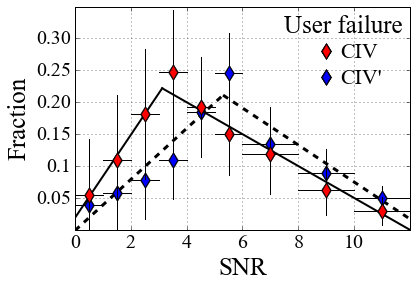

In [7]:
# plot the data
# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
# plt.title('User failure', **hfont,  fontsize=25)

# x and y ranges and scale
plt.xlim([0.0, 12])
plt.ylim([0.0, 0.35])

# x and y ticks
xlabels = ['0', '2', '4', '6', '8', '10']
plt.xticks([0, 2, 4, 6, 8, 10], 
            xlabels, **hfont, fontsize = 20)
ylabels = ['0.05', '0.1', '0.15', '0.20', '0.25', '0.30']
plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 
            ylabels, **hfont, fontsize = 20)

plt.grid(True)

z = 1.96

min_sn = np.array([0.00000, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0])
max_sn = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0, 12.0])
mid_sn = 0.5*(max_sn - min_sn) + min_sn
value = np.array([0.0394737, 0.0569565, 0.0785714,  0.108911,  0.184211,  0.245614,  0.135135, 0.0888889, 0.0500000])

n = np.array([228, 184, 140, 101,  76,  57,  74,  45,  20])
ns = value*n
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0
common_x = (0.365 + 0.001)/(0.029 + 0.04)
print(common_x, 0.04*common_x - 0.001)
x = np.array([0, 0.5, 1.5, 2.5, common_x])
best_fit = 0.04*x - 0.001
plt.plot(x, best_fit, 'k--', lw = 3, alpha = 1)
x = np.array([common_x, 5.5, 7.0, 9.0, 14.2])
best_fit = -0.029*x + 0.365
plt.plot(x, best_fit, 'k--', lw = 3, alpha = 1)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)
# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'bd', markersize=10, alpha=1.0)   


min_sn = np.array([0.00, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0])
max_sn = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0, 12.0])
mid_sn = 0.5*(max_sn - min_sn) + min_sn
value = np.array([0.054687, 0.109134, 0.181319, 0.248062, 0.192718, 0.150930, 0.118750, 0.062424, 0.029535])

n = np.array([384, 277, 182, 129, 103,  86,  96,  66,  43])
ns = value*n
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error == 0)] = 0.0278
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0
common_x = (0.3 - 0.019)/(0.065 + 0.025)
print(common_x, 0.065*common_x + 0.019)


# above : best_fit = 0.065*x + 0.019
x = np.array([0, 0.5, 1.5, 2.5, common_x])
best_fit = 0.065*x + 0.019
plt.plot(x, best_fit, 'k-', lw = 2, alpha = 1)

# below : best_fit = -0.025*x + 0.3
x = np.array([common_x, 5.5, 7.0, 9.0, 14.2])
best_fit = -0.025*x + 0.3
plt.plot(x, best_fit, 'k-', lw = 2, alpha = 1)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'rd', markersize=10, alpha=1.0)   

txt = plt.text(9.5, 0.27, "CIV", **hfont,  fontsize=22)
plt.plot([9, 9], [0.28, 0.28], 'kd', markersize=12, alpha=1.0)  
plt.plot([9, 9], [0.28, 0.28], 'rd', markersize=10, alpha=1.0)   

txt = plt.text(9.5, 0.23, "CIV'", **hfont,  fontsize=22)
plt.plot([9, 9], [0.24, 0.24], 'kd', markersize=12, alpha=1.0)  
plt.plot([9, 9], [0.24, 0.24], 'bd', markersize=10, alpha=1.0)   


txt = plt.text(7.5, 0.31, "User failure", **hfont,  fontsize=25)







plt.savefig('c4_user_failure.png', bbox_inches='tight', figsize=[24,12], dpi=500)